# Working with online data

Adapted from [A minimal plot example](https://github.com/digital-earths-global-hackathon/hk25-teams/blob/main/hk25-tutorials/simple_plot.ipynb) by Florian Ziemen

In [3]:
import intake
from easygems import healpix as egh
import matplotlib.pyplot as plt
import pandas as pd


You can read the data (and check what's available) using the Global Hackathon Catalog.

In [2]:
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["online"]
list(cat)

['ERA5',
 'IR_IMERG',
 'JRA3Q',
 'MERRA2',
 'casesm2_10km_nocumulus',
 'icon_d3hp003',
 'icon_d3hp003aug',
 'icon_d3hp003feb',
 'icon_ngc4008',
 'ifs_tco3999-ng5_deepoff',
 'ifs_tco3999-ng5_rcbmf',
 'ifs_tco3999-ng5_rcbmf_cf',
 'nicam_gl11',
 'scream-dkrz',
 'um_Africa_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_CTC_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_SAmer_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_SEA_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_glm_n1280_CoMA9_TBv1p2',
 'um_glm_n1280_GAL9',
 'um_glm_n2560_RAL3p3']

In [ ]:
# Check the parameter options
pd.DataFrame(cat["um_glm_n2560_RAL3p3"].describe()["user_parameters"])

,name,description,type,allowed,default
0,time,time resolution of the dataset,str,"[PT1H, PT3H]",PT1H
1,zoom,zoom resolution of the dataset,int,"[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]",8


## Read the data

In [ ]:
ds = cat["um_glm_n2560_RAL3p3"](zoom = 3).to_dask()  #It not using dask!
ds

# ds_url = xr.open_zarr("https://hackathon-o.s3-ext.jc.rl.ac.uk/sim-data/dev/v5/glm.n2560_RAL3p3/um.PT1H.hp_z3.zarr")
# ds_2

/home/paola/miniconda3/envs/hackathon_env/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 773MB
Dimensions:  (cell: 768, time: 10489)
Coordinates:
  * cell     (cell) int64 6kB 0 1 2 3 4 5 6 7 ... 761 762 763 764 765 766 767
    crs      float64 8B ...
  * time     (time) datetime64[ns] 84kB 2020-01-20 ... 2021-04-01
Data variables: (12/26)
    clivi    (time, cell) float32 32MB dask.array<chunksize=(1024, 768), meta=np.ndarray>
    clt      (time, cell) float32 32MB dask.array<chunksize=(1024, 768), meta=np.ndarray>
    clwvi    (time, cell) float32 32MB dask.array<chunksize=(1024, 768), meta=np.ndarray>
    hflsd    (time, cell) float32 32MB dask.array<chunksize=(1024, 768), meta=np.ndarray>
    hfssd    (time, cell) float32 32MB dask.array<chunksize=(1024, 768), meta=np.ndarray>
    huss     (time, cell) float32 32MB dask.array<chunksize=(1024, 768), meta=np.ndarray>
    ...       ...
    tas      (time, cell) float32 32MB dask.array<chunksize=(1024, 768), meta=np.ndarray>
    ts       (time, cell) float32 32MB dask.array<chunksize=(1024, 768), meta=np.ndarray>
    uas      (time, cell) float32 32MB dask.array<chunksize=(1024, 768), meta=np.ndarray>
    vas      (time, cell) float32 32MB dask.array<chunksize=(1024, 768), meta=np.ndarray>
    orog     (cell) float64 6kB dask.array<chunksize=(768,), meta=np.ndarray>
    sftlf    (cell) float64 6kB dask.array<chunksize=(768,), meta=np.ndarray>
Attributes:
    Met Office DYAMOND3 simulations:  A group of experiments have been conduc...
    bounds:                           {'lower_left_lat': -90, 'lower_left_lon...
    latitiude_convention:             [-90, 90]
    longitude_convention:             [0, 360]
    regional:                         False
    simulation:                       glm.n2560_RAL3p3
    simulation_description:           The MetUM uses a regular lat-lon grid, ...

/home/paola/miniconda3/envs/hackathon_env/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


<Figure size 640x480 with 0 Axes>

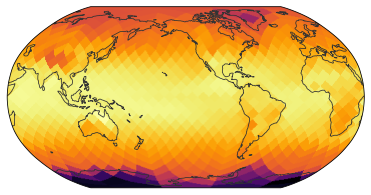

In [6]:
egh.healpix_show(ds["ts"].sel(time = "2020-05-10T00:00:00"), cmap = "inferno", dpi=72);